## <a style="color:#0f76f2" >2DNI2                            Elagas AMel </a>
## <h2>
     

# TP2 Interpolation Numérique #

## <p style="color:#011193">Lagrange :</p> 

<p>il existe p vérifiant</p>
   $$\left \{
   \begin{array}{r c l}
      p(x_0) \hspace{0.2cm}=\hspace{0.2cm} f(x_0)\hspace{0.2cm} ∀ \hspace{0.2cm}i\hspace{0.2cm}=\hspace{0.2cm}0,n \\
      deg(p) ≥ N
   \end{array}
   \right. $$

<p> ce polynome p s'appel le polynome dinterpolatin de lagrange , il est donne comme suit:</p>

$p(x) =\sum_{i=1}^N f(x_i) L_i(x) $. 

$L_i(x) = \prod_{k=0}^N \frac{x-x_k}{x_i-x_k} $.

## Exercice 1

On considère le programme MATLAB suivant :
``` octave
function u=PR(x,y,c)
S = y; 
n = length(x); 
for j=1:n
    L = c-x; 
    for k=1:n
        if (k == j)
           L(k) = 1;
        else
           L(k) = L(k)/(x(j) - x(k));
        end 
    end 
    S(j) = S(j)*prod(L); 
end 
u=sum(S); 
```

1) Que renvoie la fonction PR lorsqu'on lui déclare  x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))  et  y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))  deux vecteurs de même longueur  nn  et  cc  un nombre réel.

2) Que contient le vecteur  LL  après la fin de la boucle  k .

3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

4) On considère la fonction $F$ suivante :
$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$
et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$.

4.2)Tracer la courbe d'erreur  (la
 fonction $F-p_n$). Qu'observer vous.

## Correction:

1) Que renvoie la fonction PR lorsqu'on lui déclare  x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))  et  y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))  deux vecteurs de même longueur  nn  et  cc  un nombre réel.

In [1]:
import numpy as np
def PR(x,y,c):
    S = y.copy()
    #S = y
    n = len(x) 
    for j in range(0, n):
        L = [c - a for a in x]
       # L = c-x; 
        for k in range(0,n) :
            if (k == j):
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])
        S[j] = S[j]*np.prod(L)
    return(np.sum(S))

In [2]:
X=[1,2,3,4]
Y=[-1,0,2,1]
for i in X:
    print(PR(X,Y,i))

-1.0
0.0
2.0
1.0


<strong> 2) </strong> Que contient le vecteur  LL  après la fin de la boucle  k .

In [3]:
from numpy import prod
def PR (x,y,c):
    s=[]
    n=len(x)
    for c in x:
        for j in range(n):
            l=[c-t for t in x]
            for k in range (n):
                    if k==j:
                        l[k]=1
                    else:
                         l[k]=l[k]/(x[j]-x[k])
            s.append(y[j]*prod(l))
        return sum(s) 

In [4]:
x=[1,2,3,4]
y=[-1,0,2,1]
c=3
for t in x:
    print(PR(x,y,c))

-1.0
-1.0
-1.0
-1.0


<strong> 3) </strong> Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

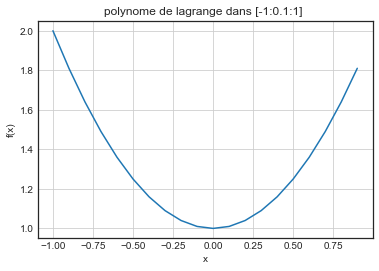

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
#T=np.linspace(-1,1,22)
T = np.arange(-1., 1., 0.1)
f=lambda x: 1/1+x**2
plt.title ("polynome de lagrange dans [-1:0.1:1] ");
plt.xlabel ("x");
plt.ylabel ("f(x)");
plt.grid(True)
plt.plot(T,f(T))

## 4) On considère la fonction $F$ suivante :
$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$
et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$.

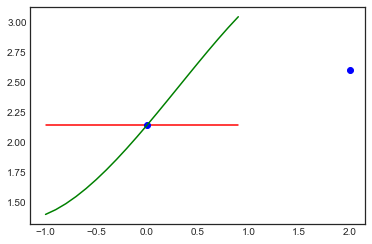

In [6]:
import math
x=[0,2]
#T=np.linspace(-1,1,22)
T = np.arange(-1., 1., 0.1)
f=lambda x: (math.pi)-(math.cos(x/2))+x*(math.sqrt(1-(x/2)**2)) 
f2 = np.vectorize(f)
y = [f(a) for a in x]
pn= []
for u in range(0,len(T)):
    pn.append(PR(x,y,T[u]))
plt.plot(T,pn,'r',x,y,'bo',T,f2(T),'g')

2)Tracer la courbe d'erreur  (la
 fonction $F-p_n$). Qu'observer vous.

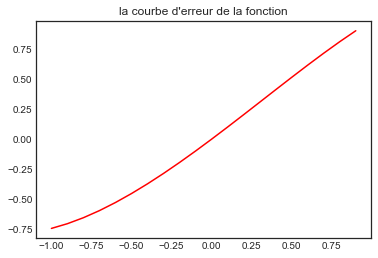

In [7]:
x=[0,2]
#T=np.linspace(-1,1,22)
T = np.arange(-1., 1., 0.1)
f=lambda x: (math.pi)-(math.cos(x/2))+x*(math.sqrt(1-(x/2)**2))
f2 = np.vectorize(f)
y = [f(a) for a in x]
plt.title("la courbe d'erreur de la fonction")
pn= []
for u in range(0,len(T)):
    pn.append(PR(x,y,T[u]))
plt.plot(T,f2(T)-pn,'r')

## <p style="color:#cd6900"> Exercice 2  ( Phenomène de Runge ):</p>


1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange
  de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,
en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :
  $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

  Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev
est meilleure qu'une  interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

## <p style="color:#cd6900"> Correction:</p>

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange
  de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,
en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

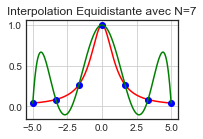

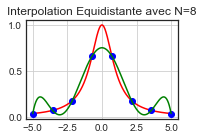

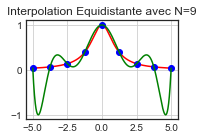

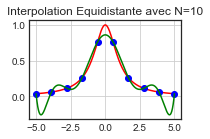

In [8]:
import matplotlib.pyplot as plt
import numpy as np
N = 7
X=np.linspace(-5, 5, N)
f = lambda x:  1./(1 + x**2)
Y = f(X)
p = np.polyfit(X, Y, N - 1)
t = np.linspace(-5, 5, 1000)
plt.subplot(2, 2, 1)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title('Interpolation Equidistante avec N=7')
plt.grid(True)   
plt.show()
#######################################################
import matplotlib.pyplot as plt
import numpy as np
N = 8
X=np.linspace(-5, 5, N)
f = lambda x:  1./(1 + x**2)
Y = f(X)
p = np.polyfit(X, Y, N - 1)
t = np.linspace(-5, 5, 1000)
plt.subplot(2, 2, 1)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title('Interpolation Equidistante avec N=8')
plt.grid(True)   
plt.show()
#######################################################
import matplotlib.pyplot as plt
import numpy as np
N = 9
X=np.linspace(-5, 5, N)
f = lambda x:  1./(1 + x**2)
Y = f(X)
p = np.polyfit(X, Y, N - 1)
t = np.linspace(-5, 5, 1000)
plt.subplot(2, 2, 1)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title('Interpolation Equidistante avec N=9')
plt.grid(True)   
plt.show()
#######################################################
import matplotlib.pyplot as plt
import numpy as np
N = 10
X=np.linspace(-5, 5, N)
f = lambda x:  1./(1 + x**2)
Y = f(X)
p = np.polyfit(X, Y, N - 1)
t = np.linspace(-5, 5, 1000)
plt.subplot(2, 2, 1)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title('Interpolation Equidistante avec N=10')
plt.grid(True)   
plt.show()

2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :
  $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

  Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev
est meilleure qu'une  interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

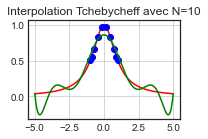

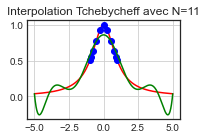

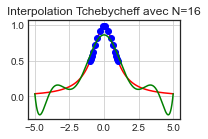

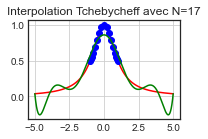

In [9]:
import matplotlib.pyplot as plt
import numpy as np
N = 10
f = lambda x:  1./(1 + x**2)
Xt=np.polynomial.chebyshev.Chebyshev(np.array([0]*10+[1])).roots()
Yt = f(Xt)
pt = np.polyfit(Xt, Yt, N - 1 )
t = np.linspace(-5, 5, 1000)
plt.subplot(2, 2, 1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(p,t),'g')
plt.title('Interpolation Tchebycheff avec N=10')
plt.grid(True)   
plt.show()
###################################################################
import matplotlib.pyplot as plt
import numpy as np
N = 11
f = lambda x:  1./(1 + x**2)
Xt=np.polynomial.chebyshev.Chebyshev(np.array([0]*11+[1])).roots()
Yt = f(Xt)
pt = np.polyfit(Xt, Yt, N - 1)
t = np.linspace(-5, 5, 1000)
plt.subplot(2, 2, 1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(p,t),'g')
plt.title('Interpolation Tchebycheff avec N=11')
plt.grid(True)   
plt.show()
##################################################################
import matplotlib.pyplot as plt
import numpy as np
N = 16
f = lambda x:  1./(1 + x**2)
Xt=np.polynomial.chebyshev.Chebyshev(np.array([0]*16+[1])).roots()
Yt = f(Xt)
pt = np.polyfit(Xt, Yt, N - 1)
t = np.linspace(-5, 5, 1000)
plt.subplot(2, 2, 1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(p,t),'g')
plt.title('Interpolation Tchebycheff avec N=16')
plt.grid(True)   
plt.show()
##################################################################
import matplotlib.pyplot as plt
import numpy as np
N = 17
f = lambda x:  1./(1 + x**2)
Xt=np.polynomial.chebyshev.Chebyshev(np.array([0]*17+[1])).roots()
Yt = f(Xt)
pt = np.polyfit(Xt, Yt, N - 1)
t = np.linspace(-5, 5, 1000)
plt.subplot(2, 2, 1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(p,t),'g')
plt.title('Interpolation Tchebycheff avec N=17')
plt.grid(True)   
plt.show()

## <p style="color:#zg2356"> Exercice 3 </p>

On considère les deux programme MATLAB suivant :
``` octave
function f=intN(x,f)% RECURSIVE
m=length(x);
for k=2:m;
    f(k:m)=(f(k:m)-f(k-1:m-1))./(x(k:m)-x(1:m+1-k))
end
``` 
``` octave
function p=intNval(x,c,t)
m=length(x);
p=c(m)*ones(size(t));
for k=m-1:-1:1;
    p=p.*(t-x(k))+c(k);
end
```

1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :


<center>
<table>    
      $\begin{array}{|c|c|c|}
   \hline
   i & x_i  & y_i \\
   \hline
   0 &   -1  &   6 \\
   1 &   0 &  1 \\
   2 &  2  &  3 \\
   3 &  5  &  66 \\
   \hline
\end{array}$  
</table>
</center>

2) Donner le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.

3) Calculer $P(1)$ en utilisant le polynôme trouvé en 1).

4) Recalculer à la main et puis à l'aide du Programme neville la valeur de $P(1)$.

## <p style="color:#zg2356"> Correction :</p>

1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :


<center>
<table>    
      $\begin{array}{|c|c|c|}
   \hline
   i & x_i  & y_i \\
   \hline
   0 &   -1  &   6 \\
   1 &   0 &  1 \\
   2 &  2  &  3 \\
   3 &  5  &  66 \\
   \hline
\end{array}$  
</table>
</center>

In [10]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)   
X,Y = np.meshgrid(x, y)
def f(X, Y):
    m=len(X)
    for k in range (2,m):
        f=(Y(k,m)-Y(k-1,m-1))/(X(k,m)-X(1,m+1-k)) 

In [11]:
x=[-1,0,2,5]
y=[6,1,3,66]
f(X,Y)

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100) 
t=np.linspace(-10,10,100) 
m=len(x)
def p(x,y,z):
    return y(m)*ones(size(t))
x, y, t = np.mgrid[-1:1:100j, -1:1:100j, -1:1:100j]

Daprés le calcule a la main le polynome de newton est le suivant :
$f(x) =1+\dfrac{82}{18}x+\dfrac{64}{18}x^2+\dfrac{28}{18}x^3 $


2) Donner le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
x=[-1,0,2,5]
y=[6,1,3,66]
plt.plot(x, y)
plt.axis([-1., 5., -20., 80.])
plt.grid()
plt.show()

3) Calculer $P(1)$ en utilisant le polynôme trouvé en 1).

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
plt.plot(x, y,'g', t,'r')
plt.axis([-1., 5., -20., 80.])
plt.grid()
plt.show()